# **1.Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **2.Mount Google Drive**

In [ ]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **3.Load Dataset**

In [ ]:
# Baca dataset dari folder DATA_MINING
df_customer = pd.read_csv("/content/drive/MyDrive/DATA_MINING/customer_behavior.csv")
df_transaction = pd.read_csv("/content/drive/MyDrive/DATA_MINING/retail_transaction.csv")

# **4. Info Awal Dataset**

In [ ]:
print("\n=== INFO CUSTOMER DATA ===")
df_customer.info()
print("\nNull Values Customer:")
print(df_customer.isnull().sum())


=== INFO CUSTOMER DATA ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB

Null Values Customer:
Customer ID                 0
Gender                     

In [ ]:
print("\n=== INFO TRANSACTION DATA ===")
df_transaction.info()
print("\nNull Values Transaction:")
print(df_transaction.isnull().sum())


=== INFO TRANSACTION DATA ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   customer_id                    500 non-null    object 
 2   date                           500 non-null    object 
 3   nearest_warehouse              500 non-null    object 
 4   shopping_cart                  500 non-null    object 
 5   order_price                    500 non-null    int64  
 6   delivery_charges               500 non-null    float64
 7   customer_lat                   500 non-null    float64
 8   customer_long                  500 non-null    float64
 9   coupon_discount                500 non-null    int64  
 10  order_total                    500 non-null    float64
 11  season                         500 non-null    object 
 12  is_expedited_delive

# **5.Data Cleansing**

In [ ]:
df_customer.drop_duplicates(inplace=True)
df_transaction.drop_duplicates(inplace=True)

df_customer.columns = df_customer.columns.str.strip()
df_transaction.columns = df_transaction.columns.str.strip()

for col in df_customer.columns:
    if df_customer[col].dtype == 'object':
        df_customer[col].fillna(df_customer[col].mode()[0], inplace=True)
    else:
        df_customer[col].fillna(df_customer[col].median(), inplace=True)

for col in df_transaction.columns:
    if df_transaction[col].dtype == 'object':
        df_transaction[col].fillna(df_transaction[col].mode()[0], inplace=True)
    else:
        df_transaction[col].fillna(df_transaction[col].median(), inplace=True)

# Konversi kolom tanggal sesuai dataset
if 'Transaction Date' in df_transaction.columns:
    df_transaction['Transaction Date'] = pd.to_datetime(df_transaction['Transaction Date'], errors='coerce')

# Normalisasi teks gender
if 'Gender' in df_customer.columns:
    df_customer['Gender'] = df_customer['Gender'].str.strip().str.title()

# Hapus data tidak logis
if 'Age' in df_customer.columns:
    df_customer = df_customer[df_customer['Age'] >= 0]
if 'TotalAmount' in df_transaction.columns:
    df_transaction = df_transaction[df_transaction['TotalAmount'] >= 0]

print("\nData Cleaning Selesai")
print(f"Customer shape: {df_customer.shape}")
print(f"Transaction shape: {df_transaction.shape}")



Data Cleaning Selesai
Customer shape: (350, 11)
Transaction shape: (500, 16)


/tmp/ipython-input-2712071265.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_customer[col].fillna(df_customer[col].median(), inplace=True)
/tmp/ipython-input-2712071265.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

# **6.Penggabungan Data**

In [ ]:
print("Kolom df_customer:", df_customer.columns.tolist())
print("Kolom df_transaction:", df_transaction.columns.tolist())

Kolom df_customer: ['Customer ID', 'Gender', 'Age', 'City', 'Membership Type', 'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied', 'Days Since Last Purchase', 'Satisfaction Level']
Kolom df_transaction: ['order_id', 'customer_id', 'date', 'nearest_warehouse', 'shopping_cart', 'order_price', 'delivery_charges', 'customer_lat', 'customer_long', 'coupon_discount', 'order_total', 'season', 'is_expedited_delivery', 'distance_to_nearest_warehouse', 'latest_customer_review', 'is_happy_customer']


In [ ]:
# ============================
# Bersihkan nama kolom
# ============================
# Hapus spasi di awal/akhir, ubah ke lowercase, ganti spasi jadi underscore
df_customer.columns = df_customer.columns.str.strip().str.lower().str.replace(' ', '_')
df_transaction.columns = df_transaction.columns.str.strip().str.lower().str.replace(' ', '_')

In [ ]:
#  Samakan tipe kolom customer_id
# ============================
df_customer['customer_id'] = df_customer['customer_id'].astype(str)
df_transaction['customer_id'] = df_transaction['customer_id'].astype(str)

In [ ]:
if 'customer_id' in df_customer.columns and 'customer_id' in df_transaction.columns:
    merged_df = pd.merge(df_customer, df_transaction, on='customer_id', how='inner')
    print("Data gabungan berhasil dibuat. Total baris:", len(merged_df))
else:
    merged_df = df_transaction.copy()
    print("Kolom 'customer_id' tidak ditemukan di salah satu DataFrame. Merge tidak dilakukan.")
display(merged_df.head())

Data gabungan berhasil dibuat. Total baris: 0


,customer_id,gender,age,city,membership_type,total_spend,items_purchased,average_rating,discount_applied,days_since_last_purchase,...,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer


# **7. Style Visualisasi**

In [ ]:
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12

# **8.Visualisasi Dasar**

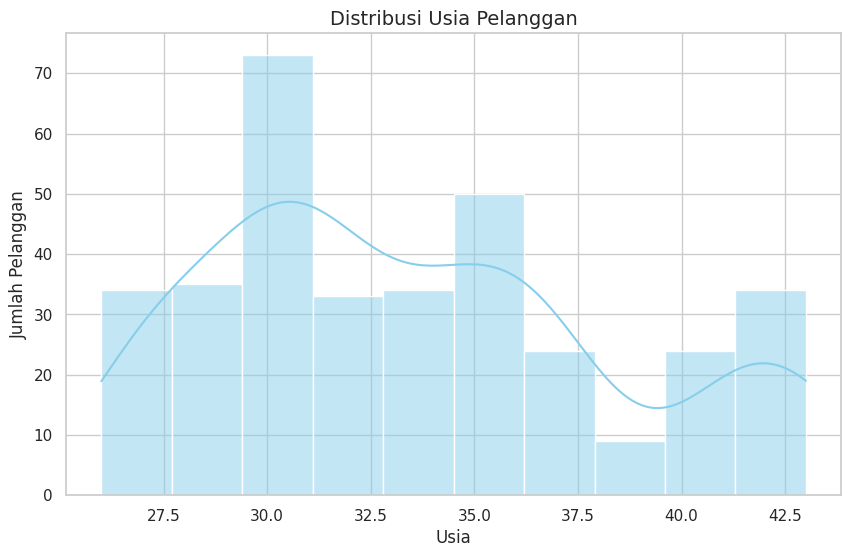

In [ ]:
if 'age' in df_customer.columns:
    sns.histplot(df_customer['age'], kde=True, color='skyblue')
    plt.title("Distribusi Usia Pelanggan")
    plt.xlabel("Usia")
    plt.ylabel("Jumlah Pelanggan")
    plt.show()

/tmp/ipython-input-2697048831.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df_customer, palette='Set2')


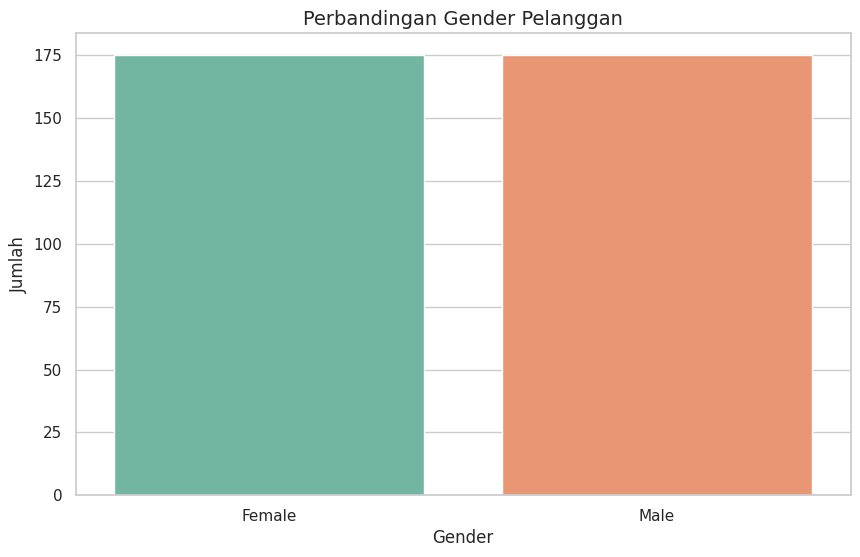

In [ ]:
# Perbandingan Gender
if 'gender' in df_customer.columns:
    sns.countplot(x='gender', data=df_customer, palette='Set2')
    plt.title("Perbandingan Gender Pelanggan")
    plt.xlabel("Gender")
    plt.ylabel("Jumlah")
    plt.show()

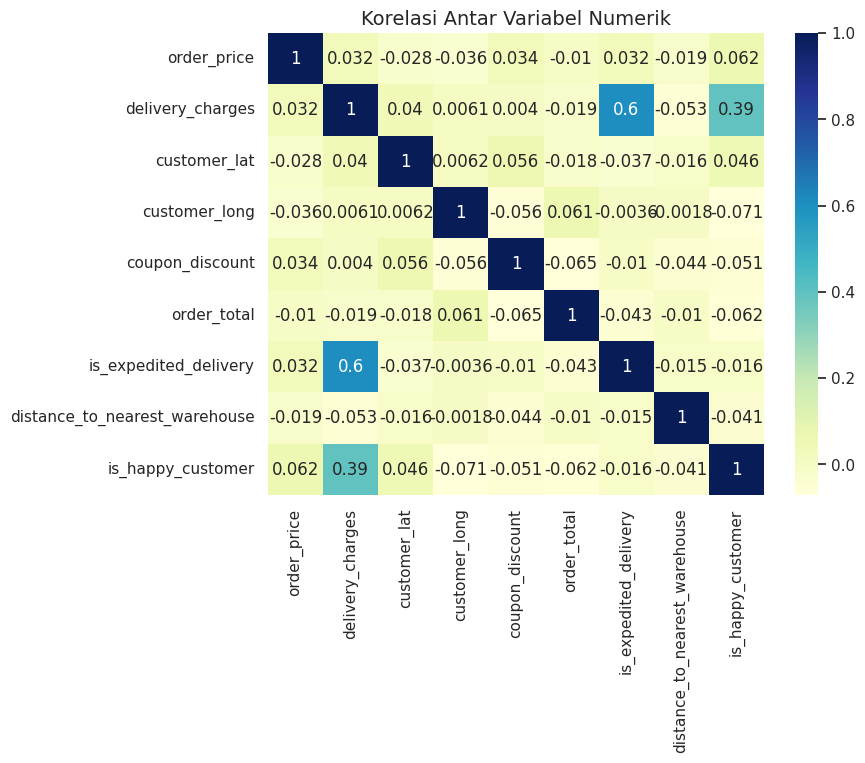

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df_transaction.corr(numeric_only=True), annot=True, cmap="YlGnBu")
plt.title("Korelasi Antar Variabel Numerik")
plt.show()

# **9.Analisis Penjualan & Transaksi**

In [ ]:
if 'transaction_date' in merged_df.columns and 'order_total' in merged_df.columns:
    # Buat kolom bulan dari tanggal transaksi
    merged_df['month'] = merged_df['transaction_date'].dt.to_period('M')

    # Hitung total penjualan per bulan
    monthly_sales = merged_df.groupby('month')['order_total'].sum()

    # Plot tren penjualan
    plt.figure(figsize=(10,6))
    monthly_sales.plot(marker='o', color='coral')
    plt.fill_between(monthly_sales.index.astype(str), monthly_sales, alpha=0.3, color='coral')
    plt.title("Tren Total Penjualan per Bulan")
    plt.xlabel("Bulan")
    plt.ylabel("Total Penjualan (Rupiah)")
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# **10.Analisis Kategori Produk & Pelanggan**

In [ ]:
if 'category' in merged_df.columns and 'order_total' in merged_df.columns:
    total_per_category = merged_df.groupby('category')['order_total'].sum().sort_values(ascending=False)

    if not total_per_category.empty:  # Cek apakah data ada
        plt.figure(figsize=(10,6))
        sns.barplot(x=total_per_category.values, y=total_per_category.index, palette="coolwarm")
        plt.title("Total Belanja per Kategori Produk")
        plt.xlabel("Total Belanja (Rupiah)")
        plt.ylabel("Kategori Produk")
        plt.tight_layout()
        plt.show()
    else:
        print("Data total belanja per kategori kosong.")
if 'customer_id' in merged_df.columns and 'order_total' in merged_df.columns:
    top_customers = merged_df.groupby('customer_id')['order_total'].sum().sort_values(ascending=False).head(10)

    if not top_customers.empty:  # Cek apakah data ada
        plt.figure(figsize=(10,6))
        sns.barplot(x=top_customers.values, y=top_customers.index, palette="viridis")
        plt.title("Top 10 Pelanggan dengan Total Belanja Tertinggi")
        plt.xlabel("Total Belanja (Rupiah)")
        plt.ylabel("Customer ID")
        plt.tight_layout()
        plt.show()
    else:
        print("Data top 10 pelanggan kosong.")

Data top 10 pelanggan kosong.


# **11.Korelasi Lanjutan (Pearson, Kendall, Spearman)**

=== Informasi Awal Data Numerik untuk Korelasi ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_price                    500 non-null    int64  
 1   delivery_charges               500 non-null    float64
 2   customer_lat                   500 non-null    float64
 3   customer_long                  500 non-null    float64
 4   coupon_discount                500 non-null    int64  
 5   order_total                    500 non-null    float64
 6   distance_to_nearest_warehouse  500 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 27.5 KB
None

Statistik Deskriptif:
         order_price  delivery_charges  customer_lat  customer_long  \
count     500.000000        500.000000    500.000000     500.000000   
mean    25522.216000         76.658200    -35.835234     144.969494   
std     86333

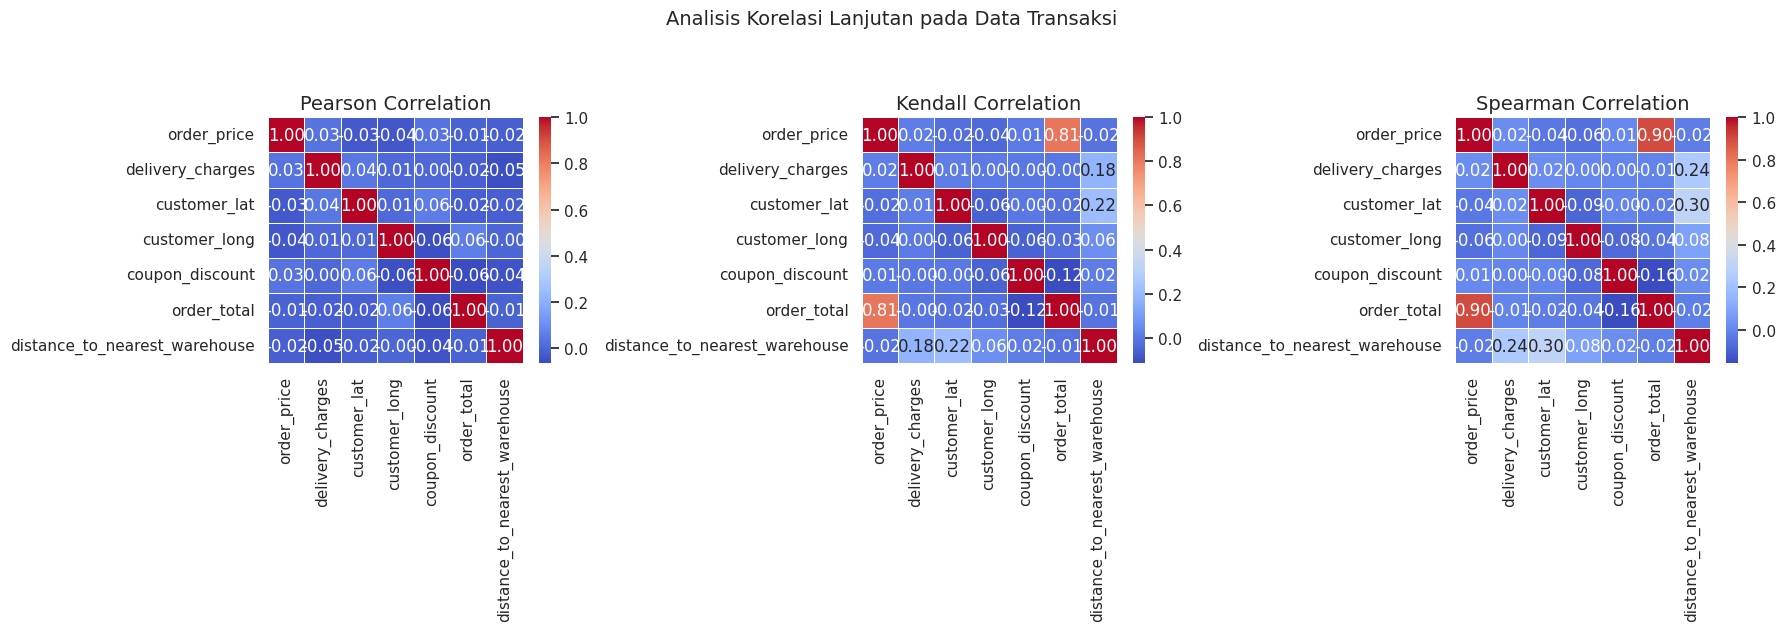


=== Korelasi Pearson ===
                               order_price  delivery_charges  customer_lat  customer_long  coupon_discount  order_total  distance_to_nearest_warehouse
order_price                       1.000000          0.031701     -0.028001      -0.035887         0.034210    -0.010384                      -0.018729
delivery_charges                  0.031701          1.000000      0.040269       0.006053         0.003976    -0.018627                      -0.052654
customer_lat                     -0.028001          0.040269      1.000000       0.006199         0.055801    -0.017829                      -0.015596
customer_long                    -0.035887          0.006053      0.006199       1.000000        -0.055523     0.061404                      -0.001828
coupon_discount                   0.034210          0.003976      0.055801      -0.055523         1.000000    -0.064631                      -0.044025
order_total                      -0.010384         -0.018627     -0.

In [ ]:
# --- 1.Pilih hanya kolom numerik dari df_transaction
df_corr = df_transaction.select_dtypes(include=['number']).dropna()

print("=== Informasi Awal Data Numerik untuk Korelasi ===")
print(df_corr.info())
print("\nStatistik Deskriptif:")
print(df_corr.describe())

# --- 2.Hitung Tiga Jenis Korelasi ---
corr_pearson = df_corr.corr(method='pearson')
corr_kendall = df_corr.corr(method='kendall')
corr_spearman = df_corr.corr(method='spearman')

# --- 3.Visualisasi Heatmap ---
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.heatmap(corr_pearson, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Pearson Correlation')

plt.subplot(1, 3, 2)
sns.heatmap(corr_kendall, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Kendall Correlation')

plt.subplot(1, 3, 3)
sns.heatmap(corr_spearman, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Spearman Correlation')

plt.suptitle('Analisis Korelasi Lanjutan pada Data Transaksi', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

# --- 4.Tampilkan Nilai Korelasi di Konsol ---
print("\n=== Korelasi Pearson ===")
print(corr_pearson.to_string())

print("\n=== Korelasi Kendall ===")
print(corr_kendall.to_string())

print("\n=== Korelasi Spearman ===")
print(corr_spearman.to_string())